In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.jaywalk_gym.jaywalk_env import JaywalkEnv, EnvParams
from src.agents.dqn.dqn_agent import DQNAgent

In [3]:
easy_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
)
easy_env = JaywalkEnv(easy_params)

In [4]:
medium_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=3,
    max_vehicles=30,
    p_vehicle_spawn=0.8,
    p_vehicle_stop=0.5,
)
medium_env = JaywalkEnv(medium_params)

In [5]:
hard_params = EnvParams(
    use_traffic_light=True,
    max_reward=100,
    wait_reward=-1,
    death_reward=-50,
    num_lane_groups=4,
    max_vehicles=50,
    p_vehicle_spawn=0.9,
    p_vehicle_stop=0.3,
)
hard_env = JaywalkEnv(hard_params)

In [7]:
import torch
import numpy as np
import pickle

torch.manual_seed(101)
np.random.seed(101)

for env_type, env in zip(["easy", "medium", "hard"], [easy_env, medium_env, hard_env]):
    train_parameters = {
            "state_dim": env.grid_shape[0] * env.grid_shape[1] + 3,
            "action_dim": 3,
            "action_space": [0, 1, 2],
            "num_layers": 4,
            "hidden_dim": 64,
            "gamma": 0.99,
            "total_training_time_step": 1000_000,
            "epsilon_start_value": 1.0,
            "epsilon_end_value": 0.05,
            "epsilon_duration": 250000,
            "replay_buffer_size": 125_000,
            "start_training_step": 500,
            "freq_update_behavior_policy": 4,
            "freq_update_target_policy": 10_000,
            "batch_size": 32,
            "learning_rate": 1e-4,
            "model_name": None,
            "device": "cpu",
            "replay_buffer_prepopulate_size": 50000,
            "scheduler_type": "linear",
        }

    agent = DQNAgent(env, train_parameters)
    result = agent.train(train_parameters["total_training_time_step"])

    filename = (
            f"./checkpoints/final_dqn/{env_type}"
        )
    agent.save(filename)

    with open(f"./checkpoints/final_dqn/{env_type}_training_results.pkl", "wb") as f:
        pickle.dump(result, f)

100%|██████████| 1000000/1000000 [06:37<00:00, 2513.33it/s]


Agent's state has been saved to ./checkpoints/final_dqn/easy


100%|██████████| 1000000/1000000 [06:45<00:00, 2464.03it/s]


Agent's state has been saved to ./checkpoints/final_dqn/medium


100%|██████████| 1000000/1000000 [06:42<00:00, 2487.37it/s]


Agent's state has been saved to ./checkpoints/final_dqn/hard


In [8]:
all_training_results = []

for env_type in ["easy", "medium", "hard"]:
    with open(f"./checkpoints/final_dqn/{env_type}_training_results.pkl", "rb") as f:
        all_training_results.append(pickle.load(f))
        

In [25]:
for re in all_training_results:
    print(re.returns.shape)

(102644,)
(61637,)
(45556,)


(102644,)
(61637,)
(45556,)


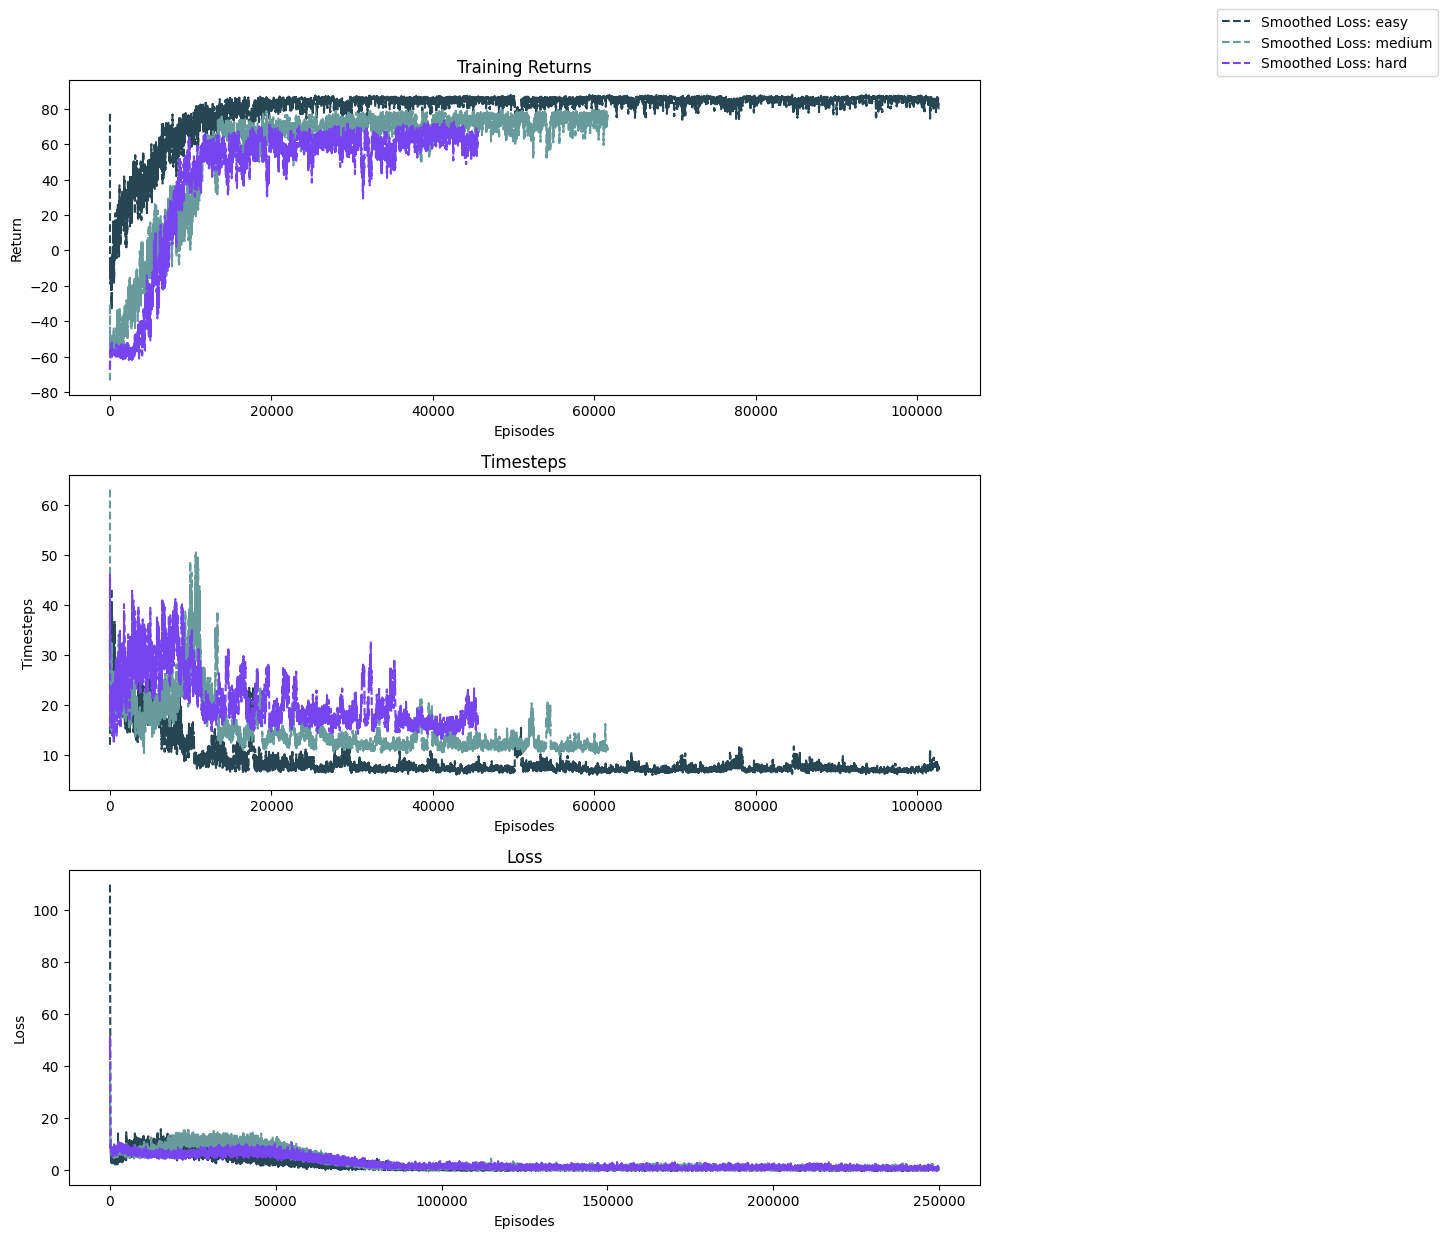

In [23]:
agent.plot_multiple_training_result(all_training_results, ["easy", "medium", "hard"])